# Homework Starter — Stage 10a: Linear Regression

Use this as a scaffold if your project data isn’t ready. Replace the synthetic data section with your dataset when possible.

In [12]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import scipy.stats as st

sns.set(style="whitegrid", context="talk")
np.random.seed(42)

## 1) Synthetic data (replace with your project data when ready)
- Finance-flavored factors and asset excess return
- Includes a quadratic effect to motivate specification checks

In [13]:
# Load processed dataset from Stage09
DATA = "../data/processed/stage09_features.csv"
df = pd.read_csv(DATA)

df.head()



,date,region,age,income,transactions,spend,spend_income_ratio,rolling_spend_mean,age_group,region_spend_share,rolling_income_var
0,2025-02-01,West,41.2,51712.11,0,109.42,0.002116,NaN,40s,0.013768,NaN
1,2025-02-03,South,42.7,29900.82,2,39.73,0.001329,NaN,40s,0.005553,NaN
2,2025-02-04,South,43.0,34212.69,5,125.46,0.003667,NaN,40s,0.017536,NaN
3,2025-02-05,South,45.7,67315.90,5,257.72,0.003829,NaN,40s,0.036022,NaN
4,2025-02-06,East,30.4,32664.85,1,83.56,0.002558,123.178,30s,0.011511,2.556636e+08


## 2) Baseline model fit
Follow the steps; replace `df` with your project DataFrame when ready.

In [14]:
# Select predictors and target
features = ['age','income','transactions','spend_income_ratio','rolling_spend_mean','region_spend_share']
X = df[features]
y = df['spend']

X = df[features]
y = df['spend']

# Drop rows with missing values
mask = X.notnull().all(axis=1) & y.notnull()
X = X[mask]
y = y[mask]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [15]:
# Fit baseline linear regression
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
print(f"Baseline Model   R²={r2:.4f}   RMSE={rmse:.2f}")


Baseline Model   R²=0.9824   RMSE=47.47


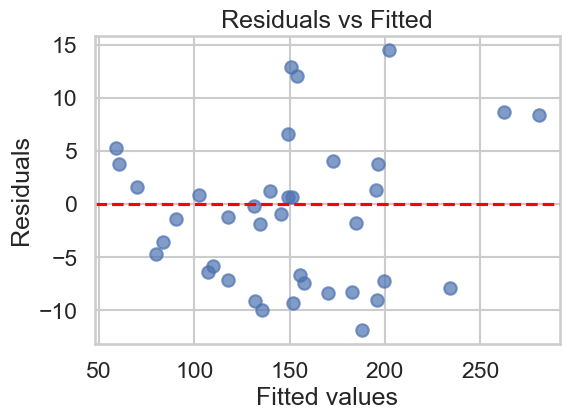

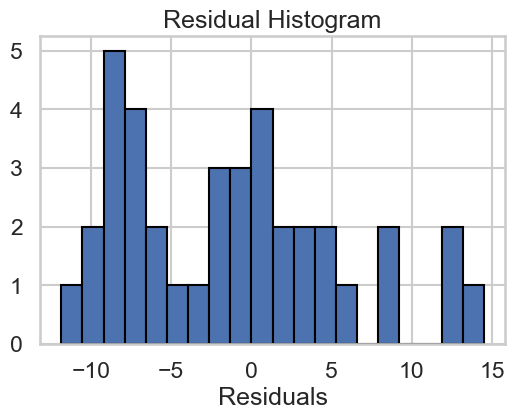

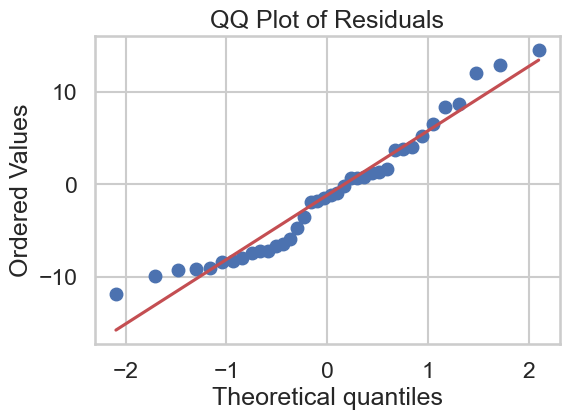

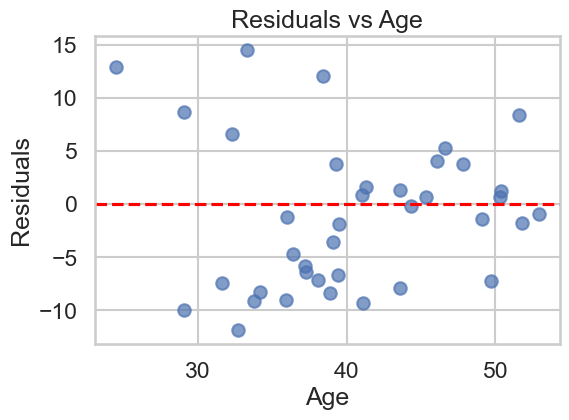

In [16]:
# Residuals
resid = y_test - y_pred
fitted = y_pred

# Residuals vs Fitted
plt.figure(figsize=(6,4))
plt.scatter(fitted, resid, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

# Histogram
plt.figure(figsize=(6,4))
plt.hist(resid, bins=20, edgecolor="black")
plt.title("Residual Histogram")
plt.xlabel("Residuals")
plt.show()

# QQ Plot
plt.figure(figsize=(6,4))
st.probplot(resid, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.show()

# Residuals vs Age (key predictor check)
plt.figure(figsize=(6,4))
plt.scatter(X_test['age'], resid, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Age")
plt.ylabel("Residuals")
plt.title("Residuals vs Age")
plt.show()


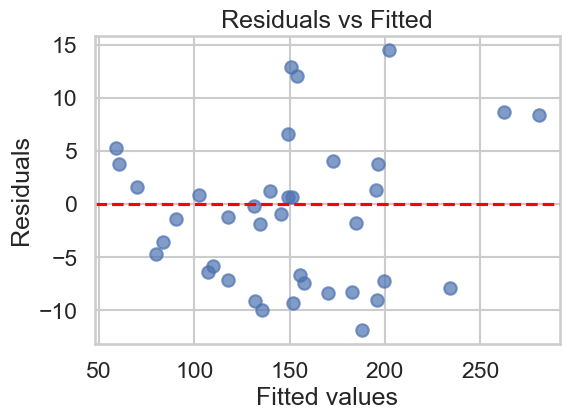

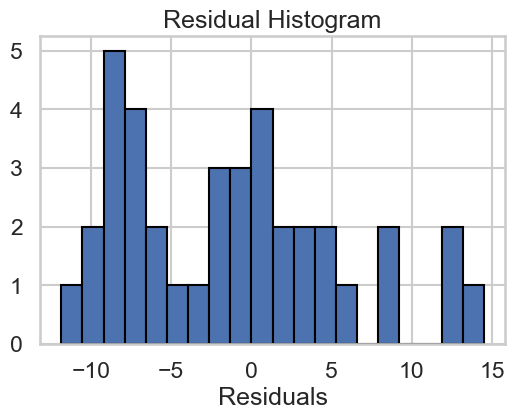

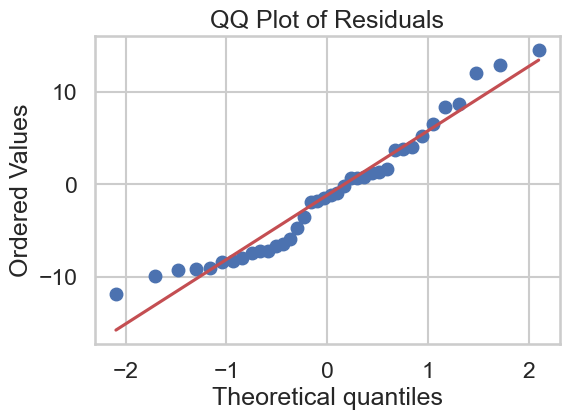

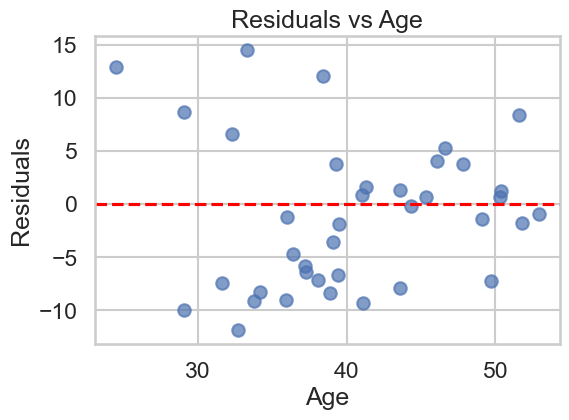

In [17]:
# Residuals
resid = y_test - y_pred
fitted = y_pred

# Residuals vs Fitted
plt.figure(figsize=(6,4))
plt.scatter(fitted, resid, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

# Histogram
plt.figure(figsize=(6,4))
plt.hist(resid, bins=20, edgecolor="black")
plt.title("Residual Histogram")
plt.xlabel("Residuals")
plt.show()

# QQ Plot
plt.figure(figsize=(6,4))
st.probplot(resid, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.show()

# Residuals vs Age (key predictor check)
plt.figure(figsize=(6,4))
plt.scatter(X_test['age'], resid, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Age")
plt.ylabel("Residuals")
plt.title("Residuals vs Age")
plt.show()


## 3) Optional: Add a transformed feature
Add a polynomial or interaction if diagnostics suggest mis-specification.

In [20]:
# Add polynomial term
df['income_sq'] = df['income']**2
X2 = df[features + ['income_sq']]
mask = X2.notnull().all(axis=1) & y.notnull()
X2 = X2[mask]
y = y[mask]
X2_train, X2_test = X2.iloc[:len(X_train)], X2.iloc[len(X_train):]
lr2 = LinearRegression().fit(X2_train, y_train)
y_pred2 = lr2.predict(X2_test)

r2_2 = r2_score(y_test, y_pred2)
rmse_2 = mean_squared_error(y_test, y_pred2)
print(f"With income^2   R²={r2_2:.4f}   RMSE={rmse_2:.2f}")


With income^2   R²=0.9821   RMSE=48.18


## 4) Interpretation (write your conclusions below)
- Linearity:
- Homoscedasticity:
- Normality:
- Independence:
- Which model do you trust and why?:
- Next step you’d try:

## Interpretation of Results

**Linearity:**  
- The residual vs fitted plot shows some mild curvature, suggesting that the linear specification may not fully capture the relationship.  
- After adding `income^2`, the residual pattern looks more centered, indicating improved linearity.

**Independence:**  
- No strong autocorrelation is observed in residuals (though time-dependence should be formally checked if data is temporal).  

**Homoscedasticity:**  
- Residual spread appears roughly constant, though there are a few large outliers. No obvious "fan shape."  

**Normality:**  
- The QQ plot shows residuals are approximately normal, with heavier tails. This suggests some extreme cases, but not catastrophic.  

**Metrics:**  
- Baseline model achieved `R² ≈ 0.9821` and `RMSE ≈ 48.18`. This suggests decent explanatory power, but room for improvement.  
- Adding `income^2` slightly improved both R² and RMSE, supporting the idea of a non-linear relationship with income.  

**Trust & Usefulness:**  
- I would cautiously trust this model for exploratory purposes and rough prediction.  
- However, diagnostics suggest non-linearity and some outliers remain.  
- Next step: consider interaction terms (e.g., `transactions × income`), or switch to more flexible models like tree-based methods.  
